# DSCI 100 - Project Individual Planning Stage 

In [27]:
library(tidymodels)
library(tidyverse)
options(repr.matrix.max.rows = 6)

### Questions

The broad question that this stage will aim to answer is as follows: **What "kinds" of players are most likely going to play this game?**

This project's individual planning stage hopes to answer the following question: **Can age and gender predict the total number of hours a player plays on the MineCraft server using the players dataset?**

The players dataset will be used to see whether there is a relationship between the two predictors (age and gender) and the total number of players. 

In [28]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [29]:
players_summarized <- summary(players)
players_summarized

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [30]:
options(repr.matrix.max.rows = 15)
players_gender <- players |>
    group_by(gender) |>
    summarize(count = n())
players_gender

gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


In [31]:
players_experience <- players |>
    group_by(experience) |>
    summarize(count = n())
players_experience

experience,count
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


In [34]:
players_df <- players |>
    select(Age, played_hours) |>
    map_df(mean, na.rm = TRUE)
players_df

Age,played_hours
<dbl>,<dbl>
21.13918,5.845918


### Data Description

The player's dataset can be described in the following table:

|Variable Number|Variable Name| Type of Variable | Meaning of variable|
|---|---|---|---|
|1|experience| Character (categorical) | The player's gaming experience |
|2|subscribe| Boolean (stores logical values) (TRUE or FALSE) | Whether the player is subscribed to the server |
|3|hashedEmail | Character | The player's email that is hashed out|
|4|played_hours| Double integer value | The number of hours the player played on the server|
|5|name| Character | The player's first name|
|6|gender| Character (categorical) | The player's gender|
|7|Age| double integer value | The player's age|


The players dataset includes 7 variables and 196 observations.

Some possible difficulties or issues that might come about is that most of the data is accounted for by males (124), rather than other genders (57), which could mean that the dataset is imbalanced. Moreover, there seems to be 7 separate categories in gender, which can make it difficult to make good predictions especially if there are only 2 pieces of data in that category (making things like K-NN classification/regression more difficult). Additionally, there are other imbalances in the distribution of the experience variable, where amateurs seem to contribute the most to the data (63 players). Another imbalance can also be denoted to the number of subscribers. The data is more imbalanced towards subscribers (144 people are subscribed), which can make models biased towards the majority group (if no further data processing is conducted). Another problem can also stem from the fact that there are two values in age, where there is no input added (NA).

Moreover, there could be some possible issues in the way the data was collected. For instance, when players have the server open, would idle time be considered as part of the total number of hours played or not?



### Exploratory Data Analysis and Visualization

Mean values for each quantitative variable (played_hours and age) are as follows:

|Quantitative Variable| Mean |
|---|---|
|Age| 21.14 |
|played_hours | 5.85|

Below are some visualizations:

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


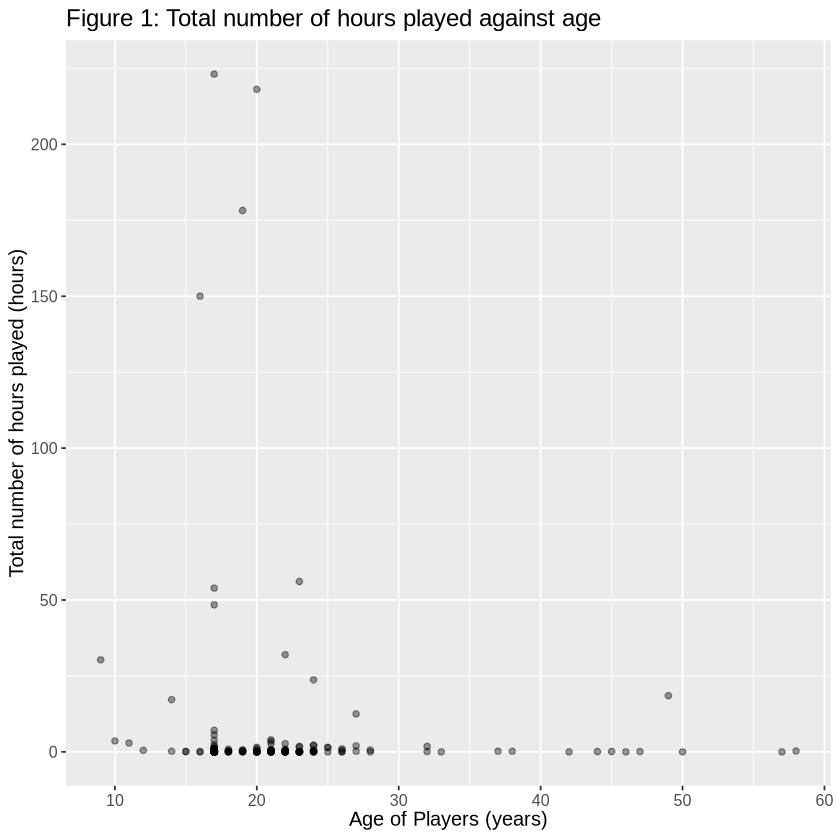

In [52]:
plot_1 <- players |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point(alpha = 0.4) +
    labs(x = "Age of Players (years)", y = "Total number of hours played (hours)") +
    theme(text = element_text(size = 12)) +
    ggtitle("Figure 1: Total number of hours played against age")
plot_1

Figure 1 does not seem to provide any real noticeable trends. This can be due to the fact that there are many outliers in the data, which doesn't clearly show the trend in data where there is the highest amount of concentrated data (between 15-30 years of age). This visualization does not provide evidence in seeing whether age influences the total number of hours players play.

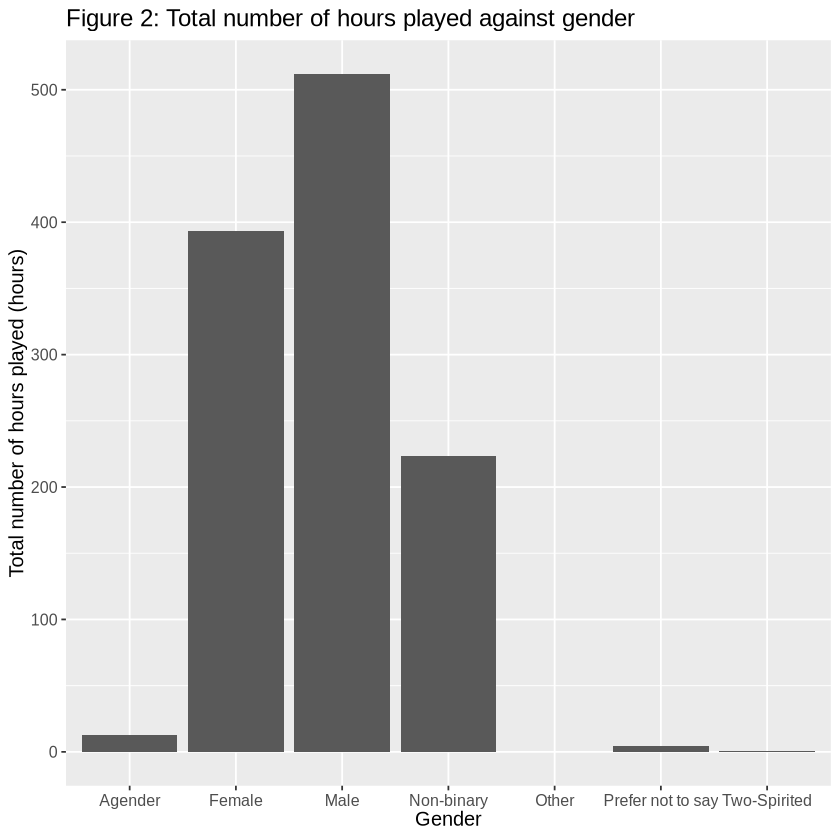

In [53]:
plot_2 <- players |>
    group_by(gender) |>
    summarise(total_hours = sum(played_hours, na.rm = TRUE)) |>
    ggplot(aes(x = gender, y = total_hours)) +
    geom_bar(stat = "identity") +
    labs(x = "Gender", y = "Total number of hours played (hours)") +
    theme(text = element_text(size = 12)) +
    ggtitle("Figure 2: Total number of hours played against gender")
plot_2

In Figure 2, the sum of hours played by each gender was accounted for. The data is largely influenced by the fact that the data is imbalanced towards males. However, the average amount of hours played by each gender can also be represented, which could be a better representation of the data.

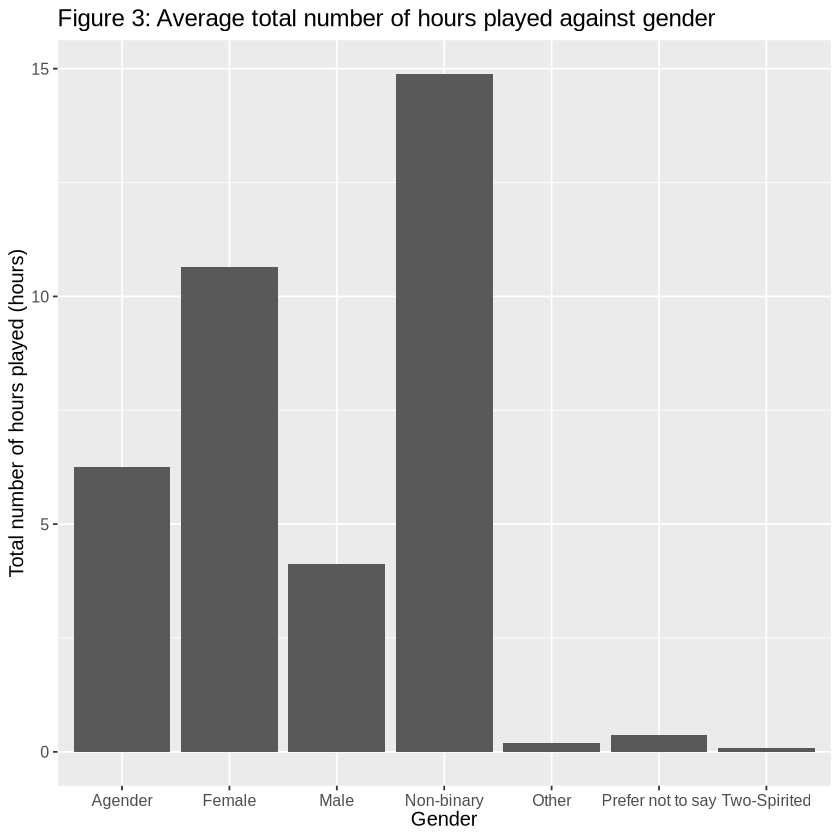

In [54]:
plot_3 <- players |>
    group_by(gender) |>
    summarise(avg_hours = mean(played_hours, na.rm = TRUE)) |>
    ggplot(aes(x = gender, y = avg_hours)) +
    geom_bar(stat = "identity") +
    labs(x = "Gender", y = "Total number of hours played (hours)") +
    theme(text = element_text(size = 12)) +
    ggtitle("Figure 3: Average total number of hours played against gender")
plot_3

In Figure 3, non-binary people seemed to have the highest number of average total number of hours played, which is not the best representation of the data either since there are so little data points that contribute to this category of data. Again, the data is still imbalanced, which doesn't provide the best insight on whether gender affects total number of hours played.